# Covid-19 현황 분석

In [299]:
import pandas as pd
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import numpy as np

In [300]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [301]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

## 서울시 데이터 분석해보기

In [302]:
df_s = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv',sep=',',encoding='euc-kr')
df_s.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,8966,11.30.,NaN,NaN,NaN,강북구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
1,8965,11.30.,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
2,8964,11.30.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
3,8963,11.30.,NaN,NaN,NaN,영등포구,NaN,서초구 사우나 관련,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
4,8962,11.30.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y


In [303]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8966 entries, 0 to 8965
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      8966 non-null   int64  
 1   확진일     8966 non-null   object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      8966 non-null   object 
 6   여행력     549 non-null    object 
 7   접촉력     8966 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      6713 non-null   object 
 10  이동경로    7136 non-null   object 
 11  등록일     8966 non-null   object 
 12  수정일     8966 non-null   object 
 13  노출여부    8966 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 980.8+ KB


In [304]:
import datetime

In [305]:
df_s['확진일']

0       11.30.
1       11.30.
2       11.30.
3       11.30.
4       11.30.
         ...  
8961     1.31.
8962     1.30.
8963     1.30.
8964     1.30.
8965     1.24.
Name: 확진일, Length: 8966, dtype: object

In [306]:
df_s['확진일'] = '2020.'  + df_s['확진일']
df_s['확진일'] = df_s['확진일'].str.replace('.','-')
df_s['확진일'] = df_s['확진일'].str.rstrip('-')

In [307]:
df_s['확진일']

0       2020-11-30
1       2020-11-30
2       2020-11-30
3       2020-11-30
4       2020-11-30
           ...    
8961     2020-1-31
8962     2020-1-30
8963     2020-1-30
8964     2020-1-30
8965     2020-1-24
Name: 확진일, Length: 8966, dtype: object

In [308]:
df_s['확진일'] = pd.to_datetime(df_s['확진일'])

In [309]:
# 확진일별 확진자수
df_s.groupby('확진일')[['연번']].count()

,연번
확진일,
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2020-11-26,204
2020-11-27,178
2020-11-28,158


In [310]:
# 지역별 확진자수
df_s.groupby('지역')[['연번']].count()

,연번
지역,
강남구,520
강동구,277
강북구,200
강서구,604
경기도,1
관악구,547
광진구,186
구로구,277
금천구,125


In [311]:
# 접촉방식에 따른 확진자수
df_s.groupby('접촉력')[['연번']].count()

,연번
접촉력,
#10015 접촉,1
#10044 접촉,2
#10054 접촉,1
#10084 접촉,1
#10115 접촉,1
...,...
해외 접촉 추정,404
해외접촉 추정,2
현대커머셜,8


In [312]:
colonaS = df_s.pivot_table('연번','확진일','지역',aggfunc='count',margins=sum)
colonaS.fillna(0.0,inplace=True)
colonaS.rename(columns={'All':'날짜별 합계'},index={'All':'지역별 합계'},inplace=True)
colonaS.head()

지역,강남구,강동구,강북구,강서구,경기도,관악구,광진구,구로구,금천구,기타,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,날짜별 합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2020-01-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3
2020-01-31 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3
2020-02-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2020-02-05 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [313]:
colonaS.tail()

지역,강남구,강동구,강북구,강서구,경기도,관악구,광진구,구로구,금천구,기타,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,날짜별 합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-11-27 00:00:00,8.0,3.0,1.0,23.0,1.0,9.0,1.0,5.0,3.0,4.0,...,10.0,17.0,5.0,7.0,5.0,4.0,0.0,11.0,4.0,178
2020-11-28 00:00:00,6.0,5.0,2.0,15.0,0.0,3.0,6.0,7.0,2.0,0.0,...,6.0,11.0,5.0,2.0,4.0,1.0,3.0,8.0,8.0,158
2020-11-29 00:00:00,12.0,2.0,8.0,15.0,0.0,7.0,3.0,3.0,6.0,0.0,...,5.0,11.0,5.0,4.0,8.0,1.0,2.0,5.0,11.0,159
2020-11-30 00:00:00,12.0,5.0,4.0,15.0,0.0,7.0,5.0,5.0,2.0,1.0,...,7.0,10.0,14.0,3.0,3.0,0.0,1.0,4.0,9.0,155
지역별 합계,520.0,277.0,200.0,604.0,1.0,547.0,186.0,277.0,125.0,234.0,...,611.0,316.0,309.0,226.0,361.0,126.0,110.0,293.0,432.0,8966


In [314]:
colonaS.to_csv('tmp.csv',sep=',',encoding='utf8')

### 그래프로 시각화하기

In [315]:
colonaS_tmp = colonaS.drop(['지역별 합계'])
colonaS_tmp.reset_index(inplace=True)
colonaS_tmp.set_index('확진일',inplace=True)

In [337]:
colonaS_tmp

지역,강남구,강동구,강북구,강서구,경기도,관악구,광진구,구로구,금천구,기타,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,날짜별 합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,5.0,2.0,1.0,56.0,0.0,8.0,1.0,7.0,4.0,1.0,...,10.0,14.0,5.0,6.0,2.0,2.0,2.0,11.0,14.0,204
2020-11-27,8.0,3.0,1.0,23.0,1.0,9.0,1.0,5.0,3.0,4.0,...,10.0,17.0,5.0,7.0,5.0,4.0,0.0,11.0,4.0,178
2020-11-28,6.0,5.0,2.0,15.0,0.0,3.0,6.0,7.0,2.0,0.0,...,6.0,11.0,5.0,2.0,4.0,1.0,3.0,8.0,8.0,158


In [316]:
monthly_colona = colonaS_tmp.resample(rule='M').sum()

In [317]:
monthly_colona.index=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월']
monthly_colona

지역,강남구,강동구,강북구,강서구,경기도,관악구,광진구,구로구,금천구,기타,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,날짜별 합계
1월,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,7
2월,8.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0,1.0,0.0,...,12.0,1.0,2.0,0.0,7.0,8.0,0.0,0.0,7.0,80
3월,36.0,6.0,5.0,20.0,0.0,30.0,5.0,33.0,11.0,2.0,...,15.0,17.0,18.0,12.0,14.0,3.0,5.0,12.0,20.0,391
4월,21.0,3.0,0.0,4.0,0.0,9.0,2.0,1.0,0.0,5.0,...,10.0,3.0,5.0,6.0,7.0,2.0,1.0,3.0,8.0,156
5월,11.0,11.0,9.0,20.0,0.0,16.0,6.0,6.0,3.0,0.0,...,11.0,6.0,11.0,20.0,7.0,3.0,3.0,3.0,12.0,228
6월,7.0,11.0,10.0,33.0,0.0,59.0,3.0,45.0,17.0,2.0,...,7.0,43.0,29.0,12.0,18.0,3.0,3.0,14.0,23.0,460
7월,15.0,14.0,4.0,25.0,0.0,27.0,5.0,5.0,7.0,4.0,...,44.0,0.0,7.0,4.0,11.0,6.0,8.0,11.0,9.0,281
8월,89.0,94.0,85.0,115.0,0.0,109.0,74.0,60.0,34.0,33.0,...,161.0,80.0,69.0,48.0,121.0,37.0,31.0,104.0,136.0,2417
9월,82.0,42.0,31.0,64.0,0.0,136.0,34.0,32.0,20.0,93.0,...,80.0,31.0,54.0,21.0,65.0,23.0,8.0,41.0,32.0,1304
10월,88.0,19.0,15.0,22.0,0.0,86.0,11.0,22.0,5.0,39.0,...,61.0,13.0,18.0,21.0,18.0,7.0,7.0,21.0,43.0,733


In [318]:
colona = monthly_colona.rename(columns={'날짜별 합계':'합계'})

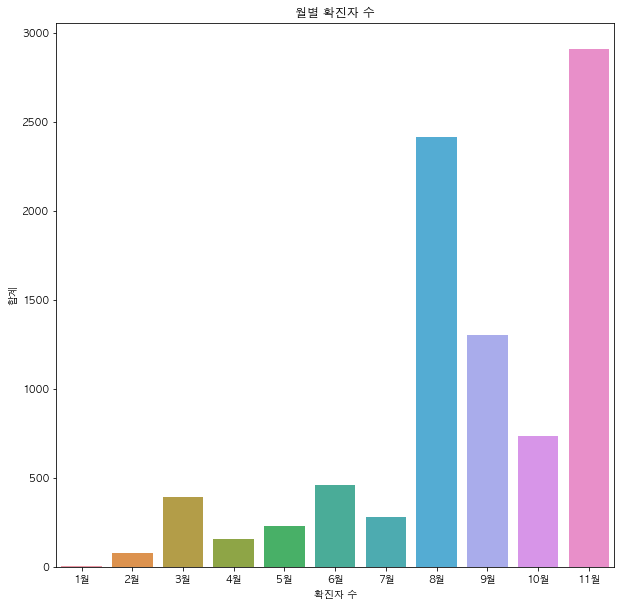

In [319]:
plt.figure(figsize=(10,10))
sns.barplot(data=colona,x=colona.index,y=colona['합계'])
plt.title('월별 확진자 수')
plt.xlabel('확진자 수')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],labels=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월'])
plt.show()

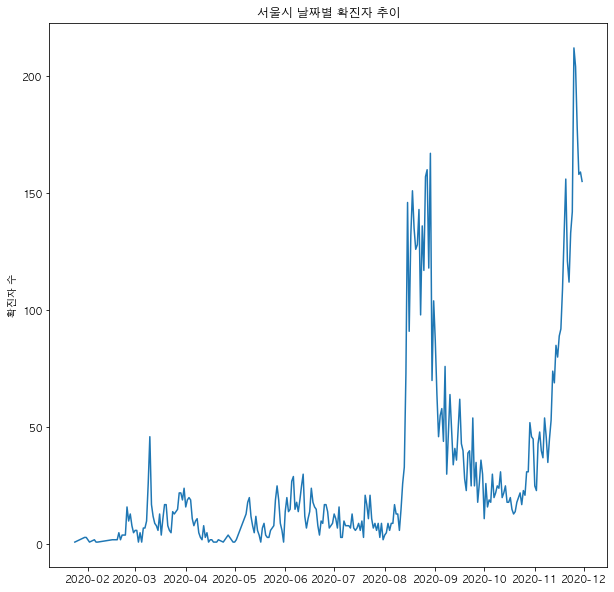

In [320]:
plt.figure(figsize=(10,10))
plt.plot(colonaS.index.tolist()[:-1],colonaS['날짜별 합계'].tolist()[:-1])
plt.ylabel('확진자 수')
plt.title('서울시 날짜별 확진자 추이')
plt.show()

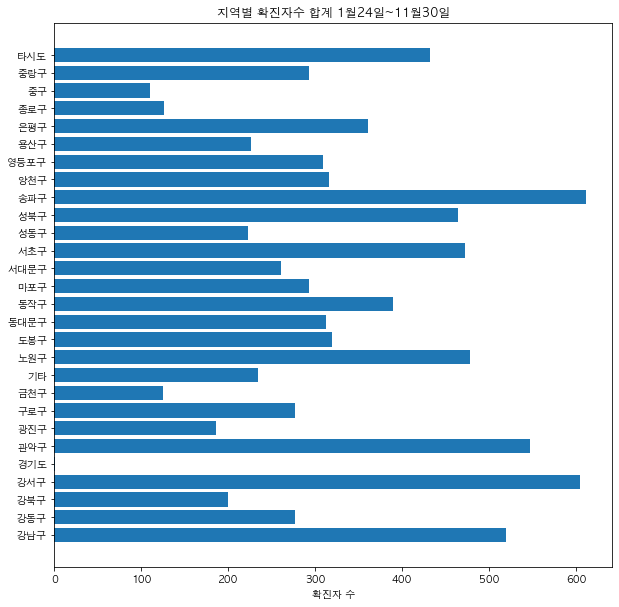

In [321]:
plt.figure(figsize=(10,10))
plt.barh(colonaS.columns.tolist()[:-1],colonaS.iloc[-1,:-1])
plt.title('지역별 확진자수 합계 1월24일~11월30일')
plt.xlabel('확진자 수')
plt.show()

In [322]:
colonaS_sort = colonaS.T.sort_values(by='지역별 합계',ascending=False)
colonaS_sort

확진일,2020-01-24 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-02 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-16 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,...,2020-11-22 00:00:00,2020-11-23 00:00:00,2020-11-24 00:00:00,2020-11-25 00:00:00,2020-11-26 00:00:00,2020-11-27 00:00:00,2020-11-28 00:00:00,2020-11-29 00:00:00,2020-11-30 00:00:00,지역별 합계
지역,,,,,,,,,,,,,,,,,,,,,
날짜별 합계,1.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,5.0,...,112.0,133.0,142.0,212.0,204.0,178.0,158.0,159.0,155.0,8966.0
송파구,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9.0,5.0,6.0,16.0,10.0,10.0,6.0,5.0,7.0,611.0
강서구,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,9.0,58.0,56.0,23.0,15.0,15.0,15.0,604.0
관악구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,1.0,8.0,9.0,3.0,7.0,7.0,547.0
강남구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,17.0,14.0,11.0,5.0,8.0,6.0,12.0,12.0,520.0
노원구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,5.0,16.0,11.0,7.0,13.0,13.0,7.0,478.0
서초구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,26.0,20.0,8.0,12.0,13.0,8.0,11.0,11.0,472.0
성북구,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,6.0,7.0,4.0,3.0,7.0,4.0,7.0,464.0
타시도,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,1.0,3.0,16.0,14.0,4.0,8.0,11.0,9.0,432.0


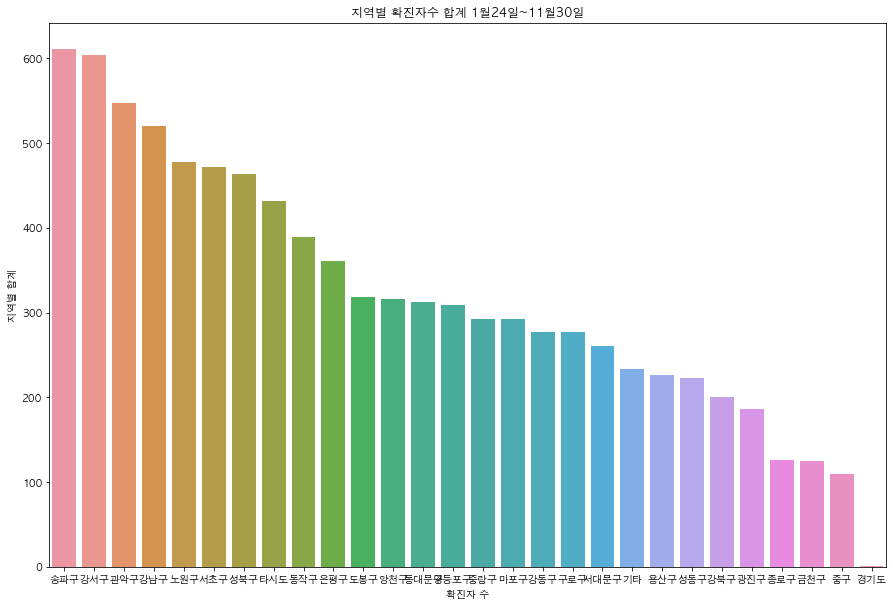

In [323]:
plt.figure(figsize=(15,10))
sns.barplot(data=colonaS_sort,x=colonaS_sort.index[1:],y=colonaS_sort['지역별 합계'][1:])
plt.title('지역별 확진자수 합계 1월24일~11월30일')
plt.xlabel('확진자 수')
plt.show()

In [325]:
gu_pop = pd.read_csv('../07.Seoul/data/CCTV_result.csv',sep=',',encoding='utf8')
gu_pop.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [324]:
colonaS.T[:-1]

확진일,2020-01-24 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-02 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-16 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,...,2020-11-22 00:00:00,2020-11-23 00:00:00,2020-11-24 00:00:00,2020-11-25 00:00:00,2020-11-26 00:00:00,2020-11-27 00:00:00,2020-11-28 00:00:00,2020-11-29 00:00:00,2020-11-30 00:00:00,지역별 합계
지역,,,,,,,,,,,,,,,,,,,,,
강남구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,17.0,14.0,11.0,5.0,8.0,6.0,12.0,12.0,520.0
강동구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,5.0,2.0,3.0,5.0,2.0,5.0,277.0
강북구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,5.0,1.0,1.0,2.0,8.0,4.0,200.0
강서구,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,9.0,58.0,56.0,23.0,15.0,15.0,15.0,604.0
경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
관악구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,1.0,8.0,9.0,3.0,7.0,7.0,547.0
광진구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,4.0,2.0,1.0,1.0,6.0,3.0,5.0,186.0
구로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,0.0,5.0,7.0,5.0,7.0,3.0,5.0,277.0
금천구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,4.0,3.0,2.0,6.0,2.0,125.0


In [327]:
gu_colona = colonaS.T[:-1]

In [326]:
gu_pop.set_index('구별',inplace=True)

In [328]:
gu_colona = gu_colona[['지역별 합계']]

In [329]:
gu_colona['인구수'] = gu_pop['인구수']
gu_colona['인구수당 누적확진자수'] = gu_colona['지역별 합계']/gu_colona['인구수']

In [330]:
gu_colona.head()

확진일,지역별 합계,인구수,인구수당 누적확진자수
지역,,,
강남구,520.0,544085.0,0.000956
강동구,277.0,462275.0,0.000599
강북구,200.0,313550.0,0.000638
강서구,604.0,589536.0,0.001025
경기도,1.0,NaN,NaN


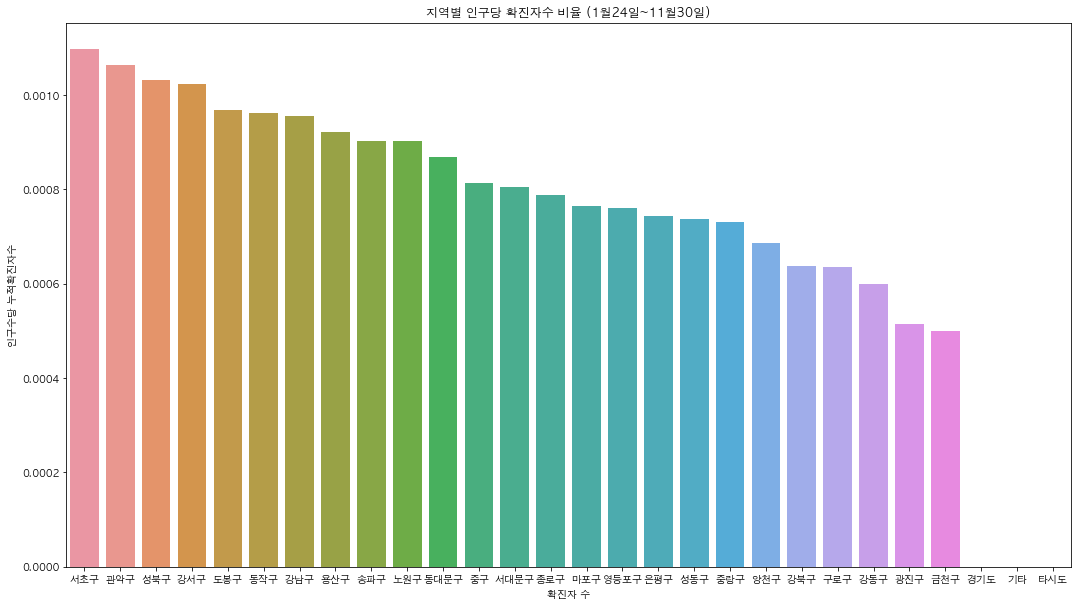

In [332]:
plt.figure(figsize=(18,10))
sns.barplot(data=gu_colona_sort,x=gu_colona_sort['지역'],y=gu_colona_sort['인구수당 누적확진자수'])
plt.title('지역별 인구당 확진자수 비율 (1월24일~11월30일)')
plt.xlabel('확진자 수')
plt.show()

In [331]:
gu_colona_sort = gu_colona.sort_values(by='인구수당 누적확진자수',ascending=False)
gu_colona_sort.reset_index(inplace=True)

## 지도 위에 표시하기

In [333]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [335]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,tiles='Stamen Toner')
map.choropleth(geo_data = geo_data,  
               data = gu_colona['인구수당 누적확진자수'],
               columns= [gu_colona.index, gu_colona['인구수당 누적확진자수']],
               fill_color= 'YlGnBu',
               key_on='feature.id'
)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>서울시 인구수당 누적확진자수</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))


map

In [334]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,tiles='Stamen Toner')
map.choropleth(geo_data = geo_data,  
               data = gu_colona['지역별 합계'],
               columns= [gu_colona.index, gu_colona['지역별 합계']],
               fill_color= 'YlGnBu',
               key_on='feature.id'
)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>서울시 누적확진자수</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))


map

In [336]:
gu_colona.to_csv('./result/구별 코로나.csv',sep=',',encoding='utf8')
colonaS.to_csv('./result/서울 코로나.csv',sep=',',encoding='utf8')